In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
data = pd.read_csv('Final_cleaned_data.csv')
data.head()

,ISBN,Publisher,Book_Title,Book_Author,First_Publish_Year,Edition_Count,Book_Age,Edition_Count_Category,Total_Reviews,No_of_Pages,Book_Length_Category,Popularity_Score,Book_Price,Bestseller
0,1881320189,River City Pub,Goodbye to the Buttermilk Sky,Julia Oliver,1994,1,33,Low,189,363,Medium,113.8,32.15,1
1,0440295734,Bantam Books,The Testament,John Grisham,1999,62,26,High,588,474,Medium,377.6,37.70,1
2,0553502271,Random House Audio,The Testament,John Grisham,1999,61,26,High,8,116,Short,29.2,5.80,0
3,0439095026,Scholastic,Tell Me This Isn't Happening,Robynn Clairday,1999,1,26,Low,165,440,Medium,99.4,32.00,1
4,0060168013,Harpercollins,Pigs in Heaven,Barbara Kingsolver,1993,13,32,Medium,88,451,Medium,58.0,38.55,1


In [59]:
drop_cols = ['ISBN', 'Book_Title', 'Book_Author','First_Publish_Year','Publisher']
data = data.drop(columns=drop_cols)

In [83]:
print("\nOriginal Data Before Transformation:")
print(data.head())


Original Data Before Transformation:
   Edition_Count  Book_Age Edition_Count_Category  Total_Reviews  No_of_Pages  \
0              1        33                    Low            189          363   
1             62        26                   High            588          474   
2             61        26                   High              8          116   
3              1        26                    Low            165          440   
4             13        32                 Medium             88          451   

  Book_Length_Category  Popularity_Score  Book_Price  Bestseller  
0               Medium             113.8       32.15           1  
1               Medium             377.6       37.70           1  
2                Short              29.2        5.80           0  
3               Medium              99.4       32.00           1  
4               Medium              58.0       38.55           1  


In [63]:
X = data.drop(columns=['Bestseller'])
y = data['Bestseller']

In [65]:
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [85]:
print("\nData After Encoding After Transformation:")
print(X.head())


Data After Encoding After Transformation:
   Edition_Count  Book_Age  Edition_Count_Category  Total_Reviews  \
0              1        33                       1            189   
1             62        26                       0            588   
2             61        26                       0              8   
3              1        26                       1            165   
4             13        32                       2             88   

   No_of_Pages  Book_Length_Category  Popularity_Score  Book_Price  
0          363                     1             113.8       32.15  
1          474                     1             377.6       37.70  
2          116                     2              29.2        5.80  
3          440                     1              99.4       32.00  
4          451                     1              58.0       38.55  


In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [71]:
print("\nTrain Dataset (X_train):")
print(X_train.head())


Train Dataset (X_train):
     Edition_Count  Book_Age  Edition_Count_Category  Total_Reviews  \
323              1        34                       1            336   
154              1        38                       1            234   
183              3        28                       1             42   
332              1        22                       1            198   
19               3        29                       1            820   

     No_of_Pages  Book_Length_Category  Popularity_Score  Book_Price  
323          763                     0             202.0       54.15  
154          826                     0             140.8       53.30  
183          842                     0              26.4       44.10  
332          590                     0             119.2       35.50  
19           403                     1             493.2       40.15  


In [73]:
print("\nTest Dataset (X_test):")
print(X_test.head())


Test Dataset (X_test):
     Edition_Count  Book_Age  Edition_Count_Category  Total_Reviews  \
482              1        26                       1            759   
679              2        23                       1            260   
895             39        51                       0             97   
632             18        36                       2            396   
866             56        33                       0            930   

     No_of_Pages  Book_Length_Category  Popularity_Score  Book_Price  
482          350                     1             455.8        37.5  
679          318                     1             156.8        35.9  
895          602                     0              73.8        50.1  
632          230                     1             244.8        29.5  
866          174                     2             580.4        28.7  


In [75]:
rf = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,  
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [77]:
print(f"\nRandom Forest Accuracy (with Bootstrapping): {acc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Random Forest Accuracy (with Bootstrapping): 0.9653

Confusion Matrix:
[[ 11   7]
 [  0 184]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        18
           1       0.96      1.00      0.98       184

    accuracy                           0.97       202
   macro avg       0.98      0.81      0.87       202
weighted avg       0.97      0.97      0.96       202



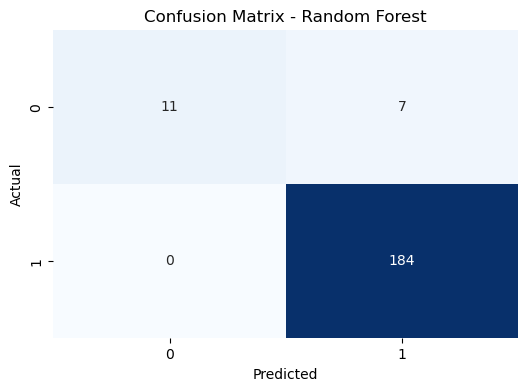

In [87]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

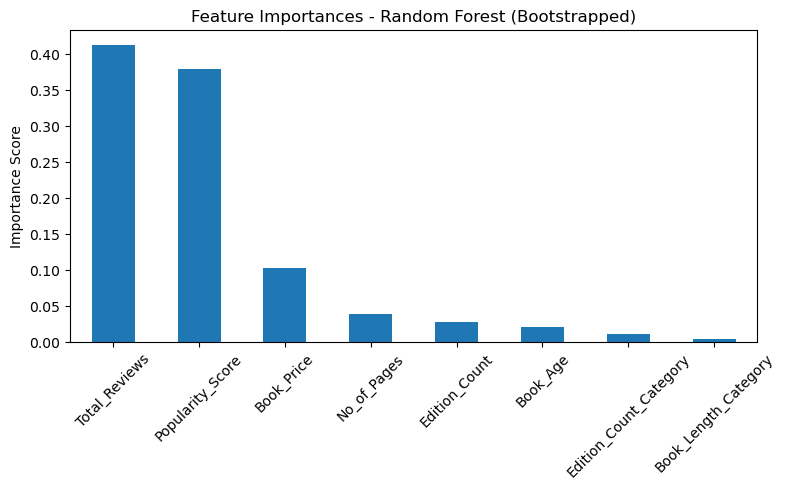

In [81]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
feature_importances.plot(kind='bar')
plt.title('Feature Importances - Random Forest (Bootstrapped)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
